# Historical Data Simulation

In [248]:
import pandas as pd
from datetime import datetime
import time
from datetime import datetime, timedelta
from IPython.core.pylabtools import figsize

In [2]:
historical = []

num_intersections = 6
num_days = 50

# One record per hour.
records_per_int = num_days * 24
id = 0

for intersection in range(0, num_intersections):
    for i in range(0, records_per_int):
        timestamp = time.time() - (i * 3600)
        hour = datetime.fromtimestamp(timestamp).hour
        cars = get_cars(hour)
        historical.append([
            id,
            intersection,
            timestamp,
            hour,
            cars
        ])

        id = id+1

data = pd.DataFrame(
    historical,
    columns=[
        'id',
        'intersection',
        'timestamp',
        'hour',
        'cars'
    ],
).set_index('id')

In [3]:
data.to_csv('historical.csv')

In [100]:
granularities = [
    'hourly',
    'daily',
    'weekly',
    'monthly',
    'yearly'
]

def floor_date(ts, granularity):
    '''
    Can pass in one of the granularities, floors the timestamp to the given
    granularity.

    '''

    dt = datetime.fromtimestamp(ts)

    if granularity == 'yearly':
        dt_floor = dt.replace(month=1, day=1, hour=0, minute=0, second=0)
    elif granularity == 'monthly':
        dt_floor = dt.replace(day=1, hour=0, minute=0, second=0)
    elif granularity == 'daily':
        dt_floor = dt.replace(hour=0, minute=0, second=0)

    # Nothing for hourly.

    return int(time.mktime(dt_floor.timetuple()))

In [101]:
granularity = 'daily'
id = 1
start_date = 1490770800.0
end_date = 1490770800.0


results = list(data[data.intersection == id].T.to_dict().values())

In [103]:
%%timeit
response = {
    'meta': {
        'id': id,
        'granularity': granularity,
        'start_date': start_date,
        'end_date': end_date,
        'results': len(results)
    },
    'data': {}
}

for result in results:
    result['cars'] = result['cars'] * 60
    result['timestamp'] = floor_date(result['timestamp'], granularity)

    # Add a new record at this timetamp.
    response['data'][result['timestamp']] = 0

# Aggregate results.
for result in results:
    stored = response['data'][result['timestamp']]
    response['data'][result['timestamp']] = stored + result['cars']

100 loops, best of 3: 11.1 ms per loop


In [73]:
import pandas as pd

results = list(data[data.intersection == id].T.to_dict().values())

In [79]:
df = pd.DataFrame(results)
df['datetime'] = pd.to_datetime(df['timestamp'])

In [96]:
datetime.fromtimestamp(1487318400.0)

datetime.datetime(2017, 2, 17, 0, 0)

In [106]:
rsp = {"meta": {"start_date": "149061240", "id": "1", "granularity": "daily", "end_date": "1490831240", "results": 1198}, "data": {"1486540800": 6221.197087314915, "1486627200": 7651.359807550103, "1488355200": 7275.193539739859, "1486800000": 7916.7633464817245, "1489305600": 7557.368364147035, "1487491200": 7619.887528333632, "1488441600": 7157.707346042386, "1489392000": 7135.753639640363, "1490256000": 7650.326318441401, "1487577600": 7552.503406087828, "1488528000": 7604.702368563361, "1489478400": 7964.6987750081835, "1489651200": 7699.295722825884, "1487404800": 7590.6842097426725, "1487664000": 7748.672924346071, "1490342400": 7155.923884834175, "1488614400": 8022.803416441756, "1489564800": 7776.709561874933, "1487750400": 7501.905360762028, "1489737600": 7155.845819494222, "1488700800": 7365.834755812246, "1490428800": 7718.557745842068, "1486886400": 7400.8782471758705, "1487836800": 7894.779051315327, "1488787200": 7970.121687491204, "1489996800": 7492.52618970839, "1489824000": 7753.817851225784, "1486972800": 7332.785121947015, "1490515200": 7525.357520063063, "1487145600": 6713.174916893246, "1487923200": 7256.868132216988, "1488873600": 6906.432264232838, "1487318400": 7727.406976647129, "1487059200": 7744.60469095761, "1488009600": 6384.206793762167, "1490601600": 7654.575987291482, "1488960000": 7075.095779166927, "1489910400": 7123.5397405762305, "1488096000": 7325.8585325211125, "1489046400": 8120.220704649388, "1490688000": 7837.599197968133, "1487232000": 6774.25822335078, "1488182400": 6506.3946118056665, "1489132800": 7474.816949249921, "1490083200": 7227.502975424445, "1486713600": 7013.314442469741, "1490774400": 6817.38403773474, "1488268800": 7362.873616826699, "1489219200": 8053.172581834075, "1490169600": 6869.6026886626205}}

In [111]:
sorted([datetime.fromtimestamp(int(i)) for i in rsp['data'].keys()])

[datetime.datetime(2017, 2, 8, 0, 0),
 datetime.datetime(2017, 2, 9, 0, 0),
 datetime.datetime(2017, 2, 10, 0, 0),
 datetime.datetime(2017, 2, 11, 0, 0),
 datetime.datetime(2017, 2, 12, 0, 0),
 datetime.datetime(2017, 2, 13, 0, 0),
 datetime.datetime(2017, 2, 14, 0, 0),
 datetime.datetime(2017, 2, 15, 0, 0),
 datetime.datetime(2017, 2, 16, 0, 0),
 datetime.datetime(2017, 2, 17, 0, 0),
 datetime.datetime(2017, 2, 18, 0, 0),
 datetime.datetime(2017, 2, 19, 0, 0),
 datetime.datetime(2017, 2, 20, 0, 0),
 datetime.datetime(2017, 2, 21, 0, 0),
 datetime.datetime(2017, 2, 22, 0, 0),
 datetime.datetime(2017, 2, 23, 0, 0),
 datetime.datetime(2017, 2, 24, 0, 0),
 datetime.datetime(2017, 2, 25, 0, 0),
 datetime.datetime(2017, 2, 26, 0, 0),
 datetime.datetime(2017, 2, 27, 0, 0),
 datetime.datetime(2017, 2, 28, 0, 0),
 datetime.datetime(2017, 3, 1, 0, 0),
 datetime.datetime(2017, 3, 2, 0, 0),
 datetime.datetime(2017, 3, 3, 0, 0),
 datetime.datetime(2017, 3, 4, 0, 0),
 datetime.datetime(2017, 3, 5, 

In [513]:
import random
import datetime
from collections import defaultdict

# Let get_cars return the number of cars per hour.

# Maping of granularity to step size.
gran = {
    'hourly': 60,
    'daily': 60*24*1,  # 1 day
    'weekly': 60*24*7,  # 7 days.
    'monthly': 60*24*30, # 30 days.
    'yearly': 60*24*365   # 365 days.
}


def mock_traffic(start_date, end_date, granularity, id):
    '''
    Strategy:
        0. Set seed == id.
        1. Start from start_date.
        2. Increment by granularity until past end_date.
        3. For each step i, calculate get_cars() for each hour in granularity.
        4. Sum results for each i, add result to response.
    '''
    
    # Weight the trendline.
    trend_wt = 0.0008

    # We seed with the id, nice hack to make intersections look the same.
    aggregate = {}
    
    # Generate a trendline.
    start_dt = datetime.datetime.fromtimestamp(start_date)
    end_dt = datetime.datetime.fromtimestamp(end_date)
    
    # y values.
    g = gran[granularity]
    start_reading = get_cars(start_dt.hour) * g
    end_reading = get_cars(end_dt.hour) * g

    # Slope and trendline.
    slope = (start_reading - end_reading) / (start_date - end_date)
    intercept = start_reading - slope * start_date
    trendline = lambda x: slope * x + intercept + random.gauss(0, g)

    # Aggregate by granularity.
    for ts in range(start_date, end_date, g):
        aggregate[ts] = 0
        hour_of_day = datetime.datetime.fromtimestamp(ts).hour
        
        reading = get_cars(hour_of_day) * g
        while reading == 0:
            reading = get_cars(hour_of_day) * g

        adjusted = (g * trend_wt * trendline(ts) + (1 - trend_wt) * reading) / 2
        aggregate[ts] = aggregate[ts] + adjusted
        
    return aggregate

In [518]:
start = 1479950000
end = 1480000000
id = 1

hourly_result = mock_traffic(id=id, start_date=start, end_date=end, granularity="hourly")
daily_result = mock_traffic(id=id, start_date=start, end_date=end, granularity="daily")
weekly_result = mock_traffic(id=id, start_date=start, end_date=end, granularity="weekly")
monthly_result = mock_traffic(id=id, start_date=start, end_date=end, granularity="monthly")
yearly_result = mock_traffic(id=id, start_date=start, end_date=end, granularity="yearly")

In [519]:
print("DAYS {}".format((end-start) / (60*24)))

DAYS 34.72222222222222


In [520]:
import matplotlib.pyplot as plt
figsize(15,5)

def plot_result(result):
    x = list(result.keys())
    y = list(result.values())
    
    plt.plot(x, y) 
    plt.ylim(0, max(y))

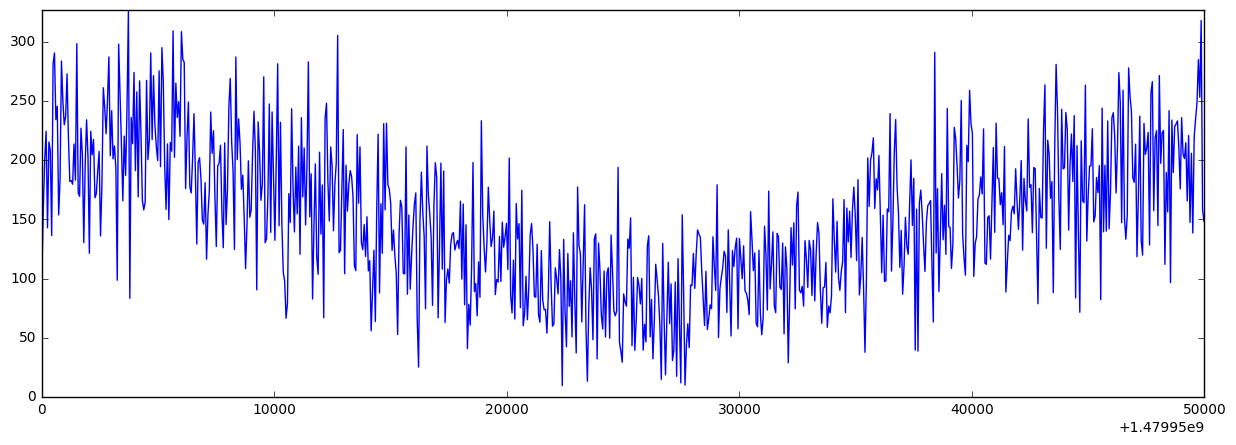

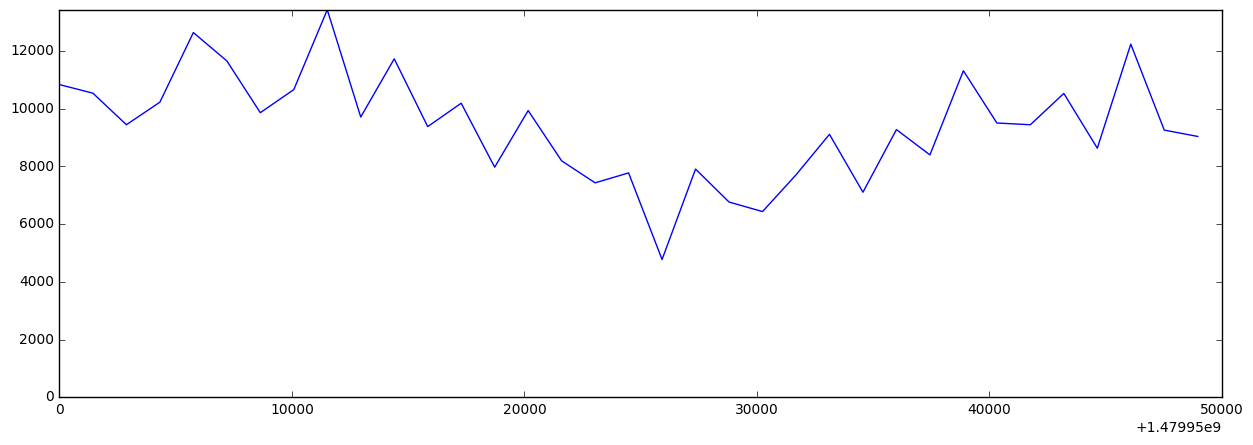

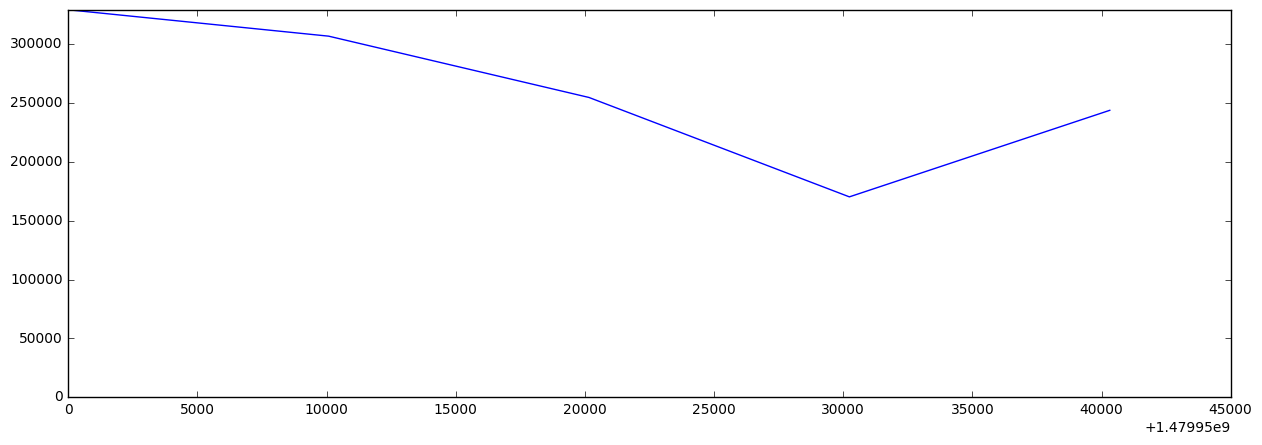

In [521]:
plot_result(hourly_result)
plt.show()

plot_result(daily_result)
plt.show()

plot_result(weekly_result)
plt.show()

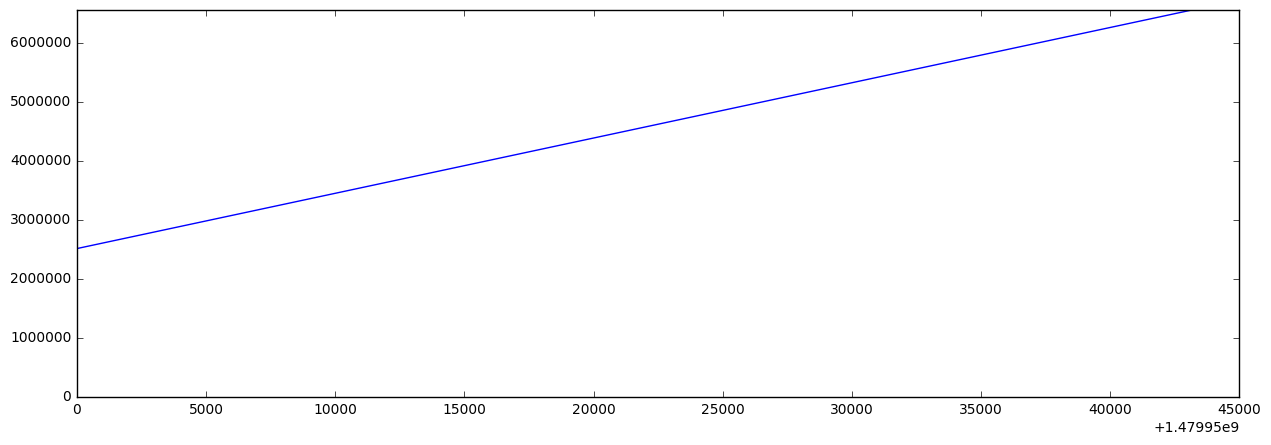

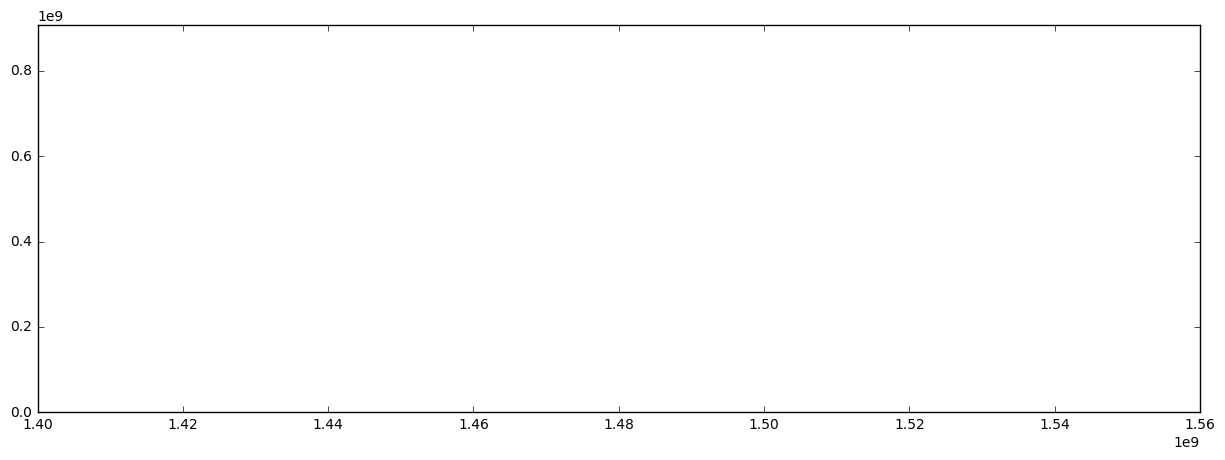

In [522]:
plot_result(monthly_result)
plt.show()

plot_result(yearly_result)
plt.show()

In [405]:
monthly_result

{1479990000: 153834.17298512612}

{1479950000: 908414354.4433665}